In [1]:
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from skimage.io import imread, imshow

import skimage.morphology
import collections.abc
import re
import nltk
from nltk.corpus import stopwords
import urllib

Q1 - Image Size

In [3]:
hamburger_picture=skimage.io.imread('Data/hamburger.jpg')
print(hamburger_picture.nbytes)

783126


Q - Dominant Channel

In [4]:
hamburger_r = hamburger_picture[:, :, 0]
hamburger_g = hamburger_picture[:, :, 1]
hamburger_b = hamburger_picture[:, :, 2]
print(round(hamburger_r.mean(),2))
print(round(hamburger_g.mean(),2))
print(round(hamburger_b.mean(),2))

90.04
84.06
37.21


Q - Morphology
binary_opening - skimage.morphology.binary_opening(image, footprint=None, out=None)
The morphological opening on an image is defined as an erosion followed by a dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks. This tends to “open” up (dark) gaps between (bright) features.

Parameters
image: ndarray
Binary input image.

footprint: ndarray, optional
The neighborhood expressed as a 2-D array of 1’s and 0’s. If None, use a cross-shaped footprint (connectivity=1).

out: ndarray of bool, optional
The array to store the result of the morphology. If None is passed, a new array will be allocated.

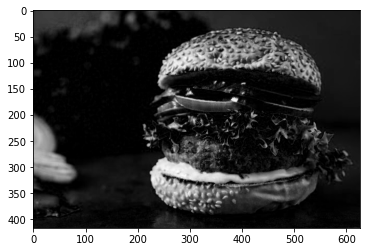

In [5]:
kernel = np.ones((3,3), dtype=np.int)
hamburger_b_open = skimage.morphology.binary_opening(hamburger_b, selem=skimage.morphology.square(3)).astype(int)
plt.imshow(hamburger_b, cmap = 'gray')
plt.show()

In [6]:
white_pixels = hamburger_b_open[hamburger_b_open==1].shape[0]
white_pixels

203762

Q
Pride and Prejudice, Part 1
The most popular text in Project Gutenberg is the book "Pride and Prejudice" by Jane Austen, 
located at http://www.gutenberg.org/files/1342/1342-0.txt. 
Split by non-word characters to get all words. How many times does the word "pride" occur in the entire Web page? 
Don't forget to account for different casing.

In [8]:
url = 'http://www.gutenberg.org/files/1342/1342-0.txt'
file = urllib.request.urlopen(url)


# urllib.request.urlopen(url) returs an object so we need to turn it to a string
text = ""
for line in file:
   text += line.decode("utf-8")

words_only = collections.Counter(re.split("\W+", text.lower()))
pride = words_only['pride']
prejudice = words_only['prejudice']
print(f'pride count: {pride}')
print(f'prejudice count: {prejudice}')

pride count: 52
prejudice count: 10


Q - Protagonist: 
Remove all stopwords. Once again, count all remaining words. What's the name of the protagonist (main character) in the book?

In [13]:
text_only_words = re.split("\\W+",text.lower())
stop_words = stopwords.words("english")
text_without_stoppers = collections.Counter([words for words in text_only_words if words not in stop_words])
text_without_stoppers.most_common(20)

[('mr', 785),
 ('elizabeth', 635),
 ('could', 526),
 ('would', 468),
 ('darcy', 417),
 ('said', 401),
 ('mrs', 343),
 ('much', 327),
 ('bennet', 323),
 ('must', 315),
 ('bingley', 306),
 ('jane', 294),
 ('miss', 283),
 ('one', 270),
 ('know', 237),
 ('though', 226),
 ('well', 224),
 ('never', 218),
 ('sister', 217),
 ('soon', 216)]